# Disjoint Set Data Structure | Introduction

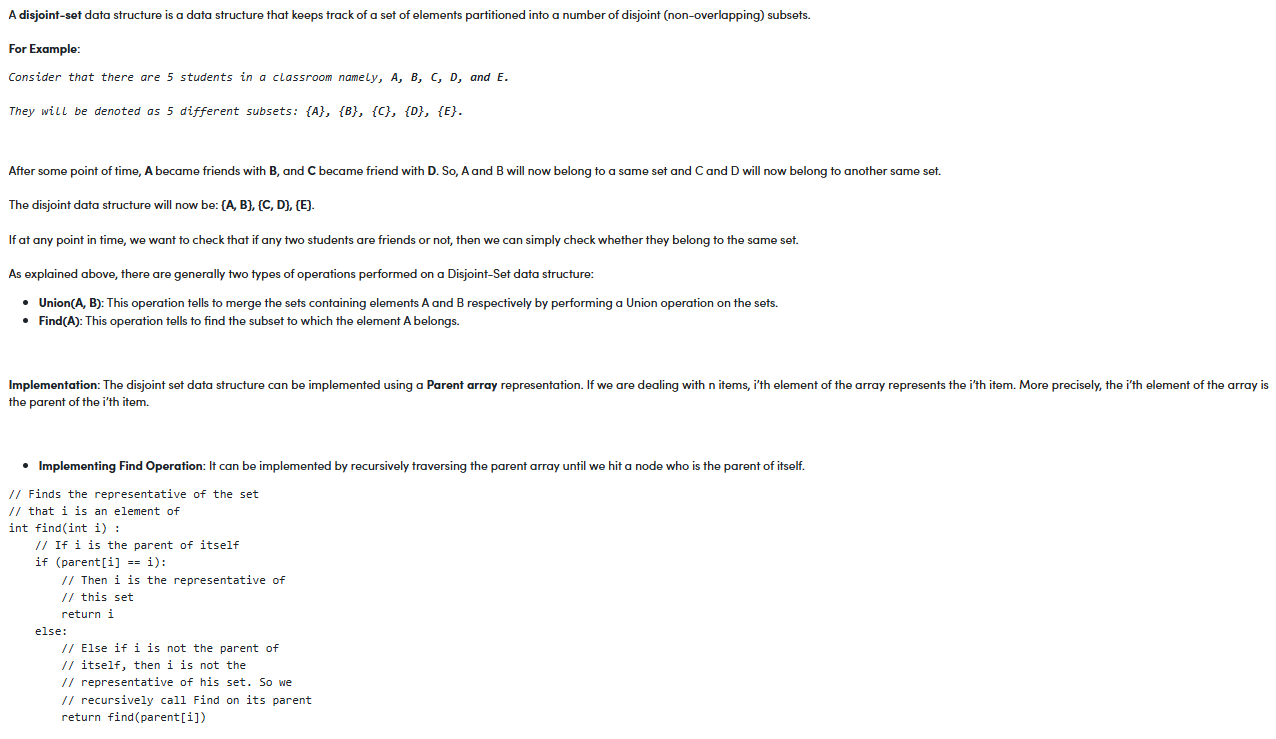

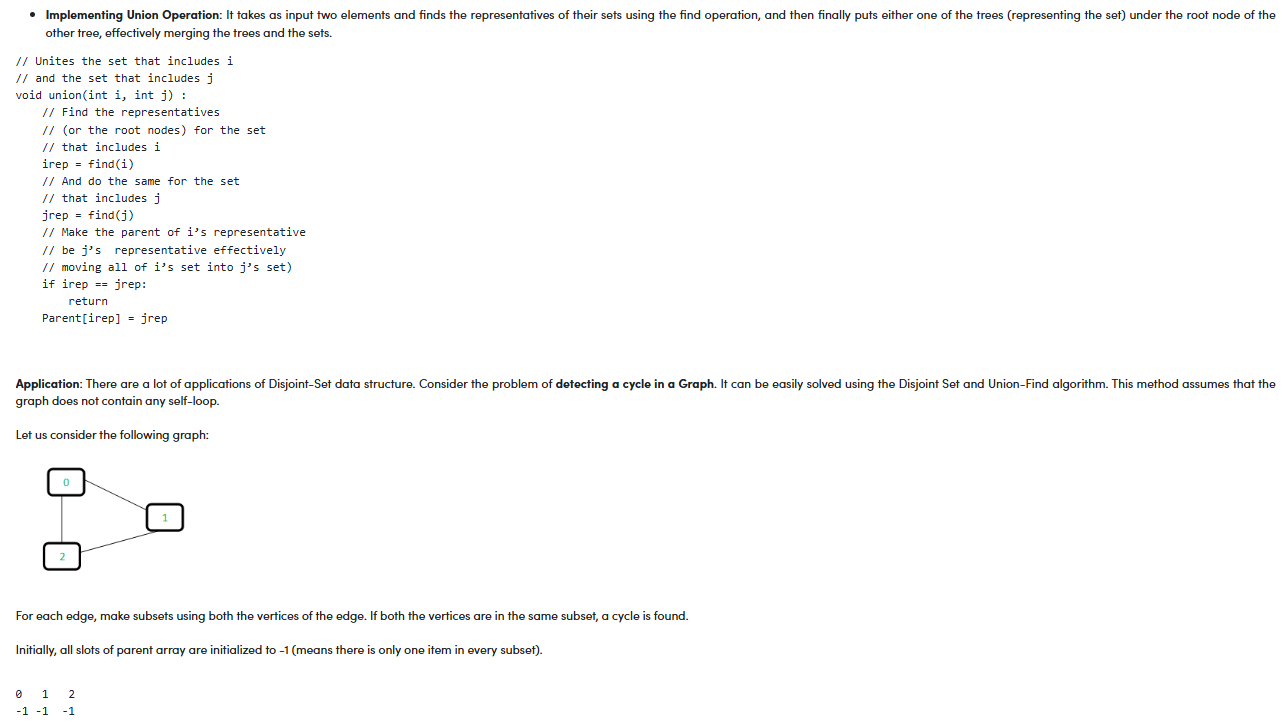

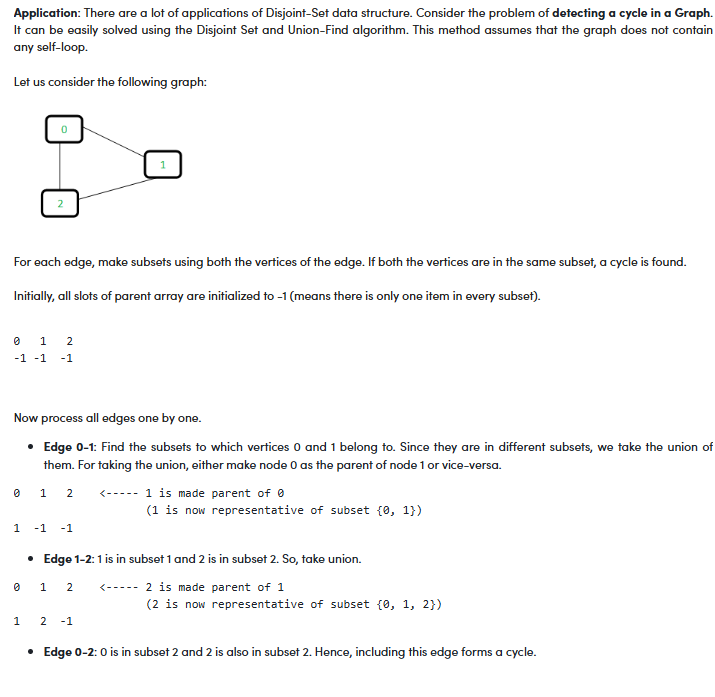

In [56]:
# Python Program for union-find algorithm
# to detect cycle in a undirected graph
# we have one egde for any two vertex
# i.e 1-2 is either 1-2 or 2-1 but not both

from collections import defaultdict

# This class represents a undirected graph
# using adjacency list representation


class Graph:

	def __init__(self, vertices):
		self.V = vertices # No. of vertices
		self.graph = defaultdict(list) # default dictionary to store graph

	# function to add an edge to graph
	def addEdge(self, u, v):
		self.graph[u].append(v)

	# A utility function to find the subset of an element i
	def find_parent(self, parent, i):
		if parent[i] == i:
			return i
		if parent[i] != i:
			return self.find_parent(parent, parent[i])

	# A utility function to do union of two subsets
	def union(self, parent, x, y):
		parent[x] = y

	# The main function to check whether a given graph
	# contains cycle or not

	def isCyclic(self):

		# Allocate memory for creating V subsets and
		# Initialize all subsets as single element sets
		parent = [0]*(self.V)
		for i in range(self.V):
			parent[i] = i

		# Iterate through all edges of graph, find subset of both
		# vertices of every edge, if both subsets are same, then
		# there is cycle in graph.
		for i in self.graph:
			for j in self.graph[i]:
				x = self.find_parent(parent, i)
				y = self.find_parent(parent, j)
				if x == y:
					return True
				self.union(parent, x, y)


# Create a graph given in the above diagram
g = Graph(3)
g.addEdge(0, 1)
g.addEdge(1, 2)
g.addEdge(2, 0)

if g.isCyclic():
	print("Graph contains cycle")
else:
	print("Graph does not contain cycle ")

Graph contains cycle


**Note: The implementation of union() and find() is naive and takes O(n) time in worst case. These methods can be improved to O(Logn) using Union by Rank or Height.**

# Union by Rank and Path Compression

**In the previous post, we introduced union find algorithm and used it to detect cycle in a graph. We used the following union() and find() operations for subsets**.

In [57]:
# Naive implementation of find
def find(parent, i):

	if (parent[i] == -1):
		return i

	return find(parent, parent[i])

# Naive implementation of union()
def Union(parent, x, y):

	xset = find(parent, x)
	yset = find(parent, y)
	parent[xset] = yset

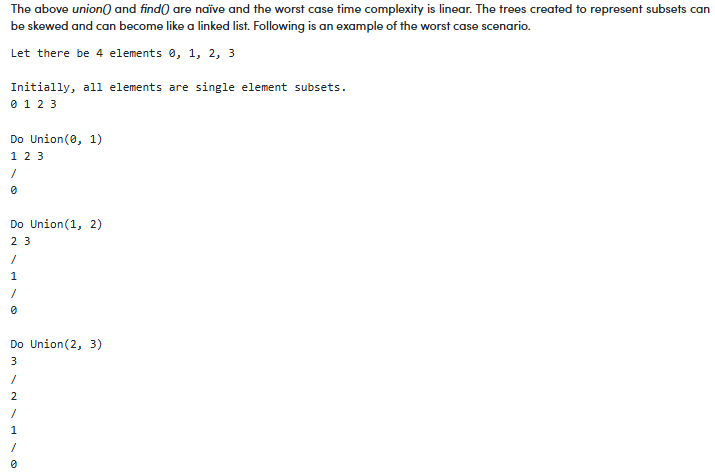

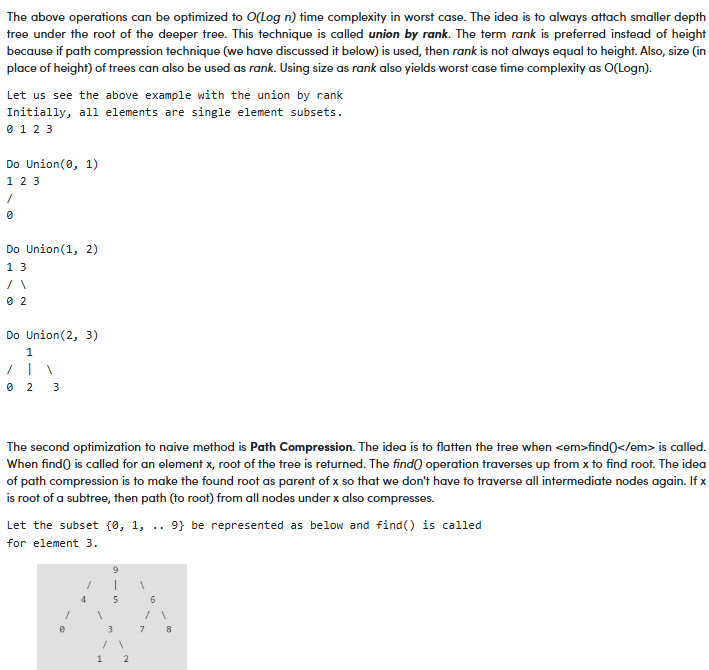

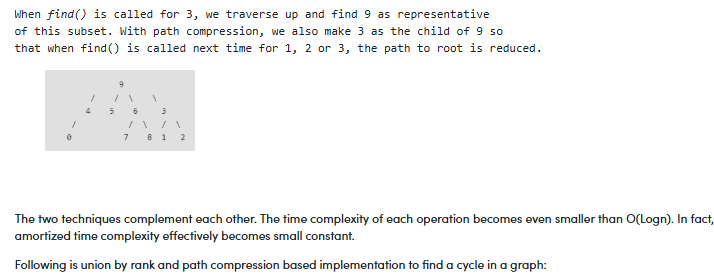

In [58]:
# A union by rank and path compression based
# program to detect cycle in a graph
from collections import defaultdict

# a structure to represent a graph


class Graph:

	def __init__(self, num_of_v):
		self.num_of_v = num_of_v
		self.edges = defaultdict(list)

	# graph is represented as an
	# array of edges
	def add_edge(self, u, v):
		self.edges[u].append(v)


class Subset:
	def __init__(self, parent, rank):
		self.parent = parent
		self.rank = rank

# A utility function to find set of an element
# node(uses path compression technique)


def find(subsets, node):
	if subsets[node].parent != node:
		subsets[node].parent = find(subsets, subsets[node].parent)
	return subsets[node].parent

# A function that does union of two sets
# of u and v(uses union by rank)


def union(subsets, u, v):

	# Attach smaller rank tree under root
	# of high rank tree(Union by Rank)
	if subsets[u].rank > subsets[v].rank:
		subsets[v].parent = u
	elif subsets[v].rank > subsets[u].rank:
		subsets[u].parent = v

	# If ranks are same, then make one as
	# root and increment its rank by one
	else:
		subsets[v].parent = u
		subsets[u].rank += 1

# The main function to check whether a given
# graph contains cycle or not


def isCycle(graph):

	# Allocate memory for creating sets
	subsets = []

	for u in range(graph.num_of_v):
		subsets.append(Subset(u, 0))

	# Iterate through all edges of graph,
	# find sets of both vertices of every
	# edge, if sets are same, then there
	# is cycle in graph.
	for u in graph.edges:
		u_rep = find(subsets, u)

		for v in graph.edges[u]:
			v_rep = find(subsets, v)

			if u_rep == v_rep:
				return True
			else:
				union(subsets, u_rep, v_rep)


# Driver Code
g = Graph(3)

# add edge 0-1
g.add_edge(0, 1)

# add edge 1-2
g.add_edge(1, 2)

# add edge 0-2
g.add_edge(0, 2)

if isCycle(g):
	print('Graph contains cycle')
else:
	print('Graph does not contain cycle')

Graph contains cycle


# Kruskal's Algorithm

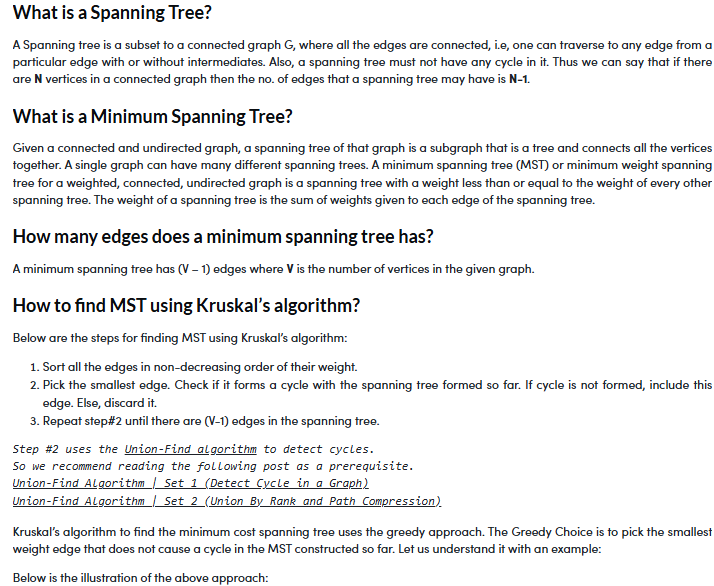

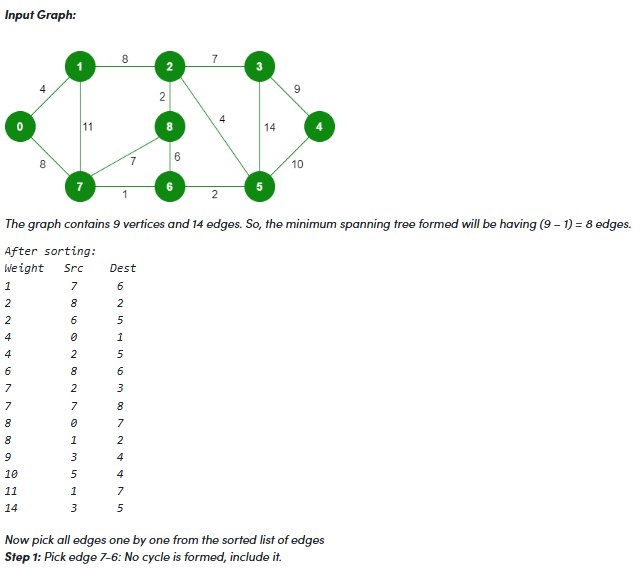

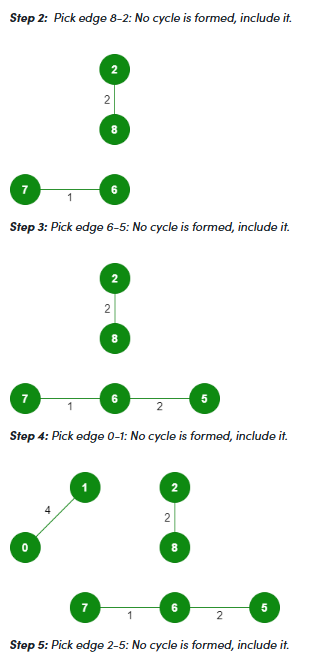

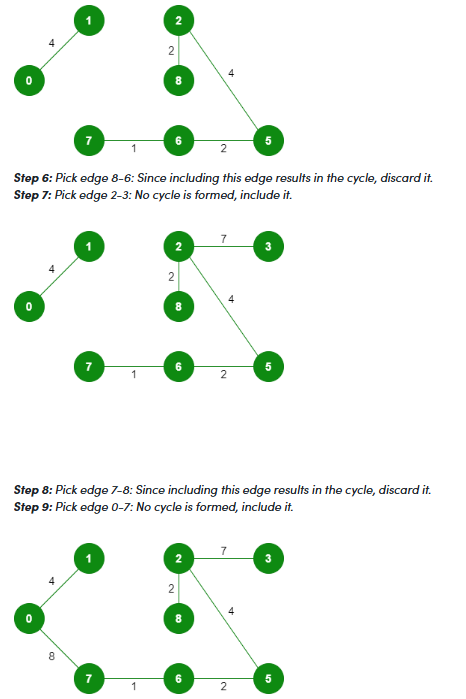

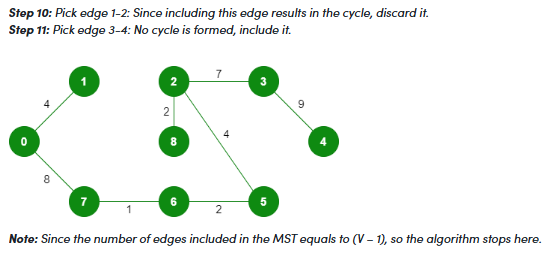

In [59]:
# Python program for Kruskal's algorithm to find
# Minimum Spanning Tree of a given connected,
# undirected and weighted graph

# Class to represent a graph


class Graph:

	def __init__(self, vertices):
		self.V = vertices # No. of vertices
		self.graph = []
		# to store graph

	# function to add an edge to graph
	def addEdge(self, u, v, w):
		self.graph.append([u, v, w])

	# A utility function to find set of an element i
	# (truly uses path compression technique)
	def find(self, parent, i):
		if parent[i] != i:
		# Reassignment of node's parent to root node as
		# path compression requires
			parent[i] = self.find(parent, parent[i])
		return parent[i]

	# A function that does union of two sets of x and y
	# (uses union by rank)
	def union(self, parent, rank, x, y):

		# Attach smaller rank tree under root of
		# high rank tree (Union by Rank)
		if rank[x] < rank[y]:
			parent[x] = y
		elif rank[x] > rank[y]:
			parent[y] = x

		# If ranks are same, then make one as root
		# and increment its rank by one
		else:
			parent[y] = x
			rank[x] += 1

	# The main function to construct MST using Kruskal's
		# algorithm
	def KruskalMST(self):

		result = [] # This will store the resultant MST

		# An index variable, used for sorted edges
		i = 0

		# An index variable, used for result[]
		e = 0

		# Step 1: Sort all the edges in
		# non-decreasing order of their
		# weight. If we are not allowed to change the
		# given graph, we can create a copy of graph
		self.graph = sorted(self.graph,
							key=lambda item: item[2])

		parent = []
		rank = []

		# Create V subsets with single elements
		for node in range(self.V):
			parent.append(node)
			rank.append(0)

		# Number of edges to be taken is equal to V-1
		while e < self.V - 1:

			# Step 2: Pick the smallest edge and increment
			# the index for next iteration
			u, v, w = self.graph[i]
			i = i + 1
			x = self.find(parent, u)
			y = self.find(parent, v)

			# If including this edge doesn't
			# cause cycle, then include it in result
			# and increment the index of result
			# for next edge
			if x != y:
				e = e + 1
				result.append([u, v, w])
				self.union(parent, rank, x, y)
			# Else discard the edge

		minimumCost = 0
		print("Edges in the constructed MST")
		for u, v, weight in result:
			minimumCost += weight
			print("%d -- %d == %d" % (u, v, weight))
		print("Minimum Spanning Tree", minimumCost)


# Driver's code
if __name__ == '__main__':
	g = Graph(4)
	g.addEdge(0, 1, 10)
	g.addEdge(0, 2, 6)
	g.addEdge(0, 3, 5)
	g.addEdge(1, 3, 15)
	g.addEdge(2, 3, 4)

	# Function call
	g.KruskalMST()

Edges in the constructed MST
2 -- 3 == 4
0 -- 3 == 5
0 -- 1 == 10
Minimum Spanning Tree 19


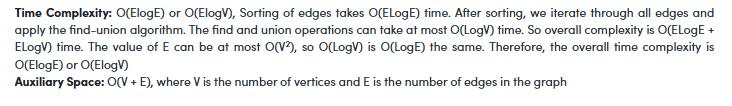